# Künstliche neuronale Netze

<img src="https://www.tibco.com/sites/tibco/files/media_entity/2021-05/neutral-network-diagram.svg" alt="KNN" width="500"> 
<img src="https://www.informatik-aktuell.de/fileadmin/_processed_/e/3/csm_abb1_neuron_schaaf_838017ca59.png" alt="KNN" width="600"> 
  
- Neuronale Netze bestehen aus drei Schichten: Eingabeschicht, verborgene Schicht(en), Ausgabeschicht
- jede Eingabe wird mit einem Gewicht multipliziert und zusammen mit einem Bias die Summe gebildet, wird nun ein bestimmter Schwellenwert überschritten feuert die Aktivierungsfunktion und ein Output wird kreiert
- Anwendung: Bilderkennung, Spracherkennung, autonomes Fahren, Zeitreihenanalyse, Klassifikation, Clustering etc.

In [1]:
import numpy as np
import seaborn as sns

## Aktivierungsfunktionen

In [2]:
sns.set(rc={"figure.figsize":(10,5)})
sns.set_style("whitegrid")
x=np.arange(-4,4,0.1)

### 1) Linear

$$f(x)=x$$

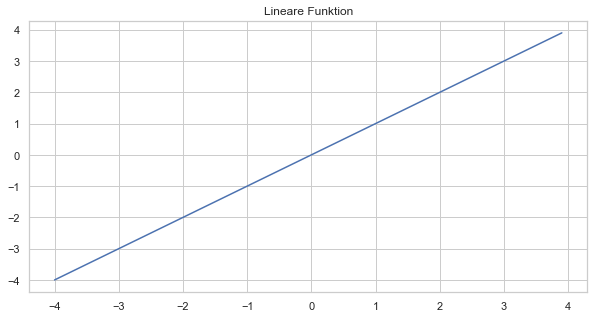

In [3]:
def linear(x):
    return x
yl=linear(x)
sns.lineplot(x=x,y=yl).set(title="Lineare Funktion");

- sehr einfache Implementierung
- kann nur bei linearen Zusammenhänge genutzt werden

### 2) Sigmoid

$$f(x) = {1 \over 1+e^{-x}}$$

In [4]:
print("Eulersche Zahl entspricht:",np.exp(1))

Eulersche Zahl entspricht: 2.718281828459045


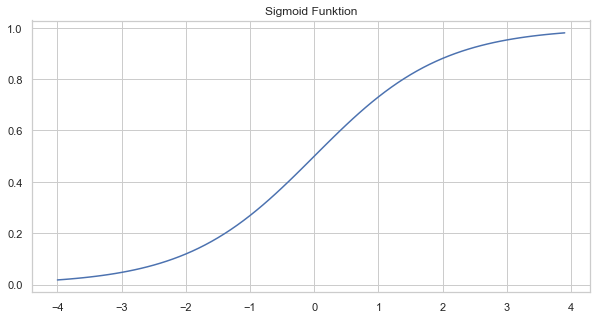

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
ys=sigmoid(x)
sns.lineplot(x=x,y=ys).set(title="Sigmoid Funktion");

- Wertebereich zwischen 0 und 1
- bei Klassifikation geeignet
- Nachteil: für sehr große oder sehr kleine Inputs immer nahe bei 0 oder 1 
- nicht null-zentriert (macht "lernen" des neuronalen Netzes schwieriger)
- bei mehreren Klassen softmax

### 3) Tanh

$$f(x) = {e^{x}-e^{-x} \over e^{x}+e^{-x}}$$

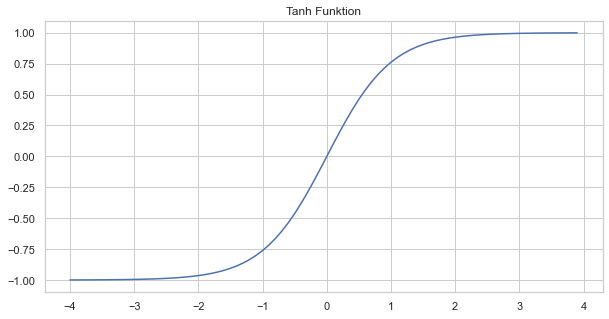

In [6]:
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
yt=tanh(x)
sns.lineplot(x=x,y=yt).set(title="Tanh Funktion");

- Wertebereich zwischen -1 und 1
- Null zentriert, dadurch schneller als sigmoid
- Nachteil: für sehr große oder sehr kleine Inputs immer nahe bei -1 oder 1 

### 4) Rectified Linear Units (ReLU)

$$f(x) = {max(0,x)}$$

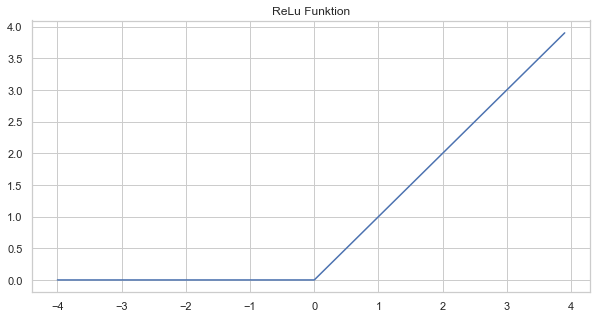

In [7]:
def relu(x):
    return np.maximum(0,x)
yr=relu(x)
sns.lineplot(x=x,y=yr).set(title="ReLu Funktion");

- linear für Eingabewerte größer 0
- geeignet bei Netzen mt vielen Schichten (Deep Learning)
- Neuronen können "sterben", wenn diese unter 0 liegen und leisten keinen Anteil mehr zum Lernverfahren im neuronalen Netz

### Vergleich der verschiedenen Aktivierungsfunktionen

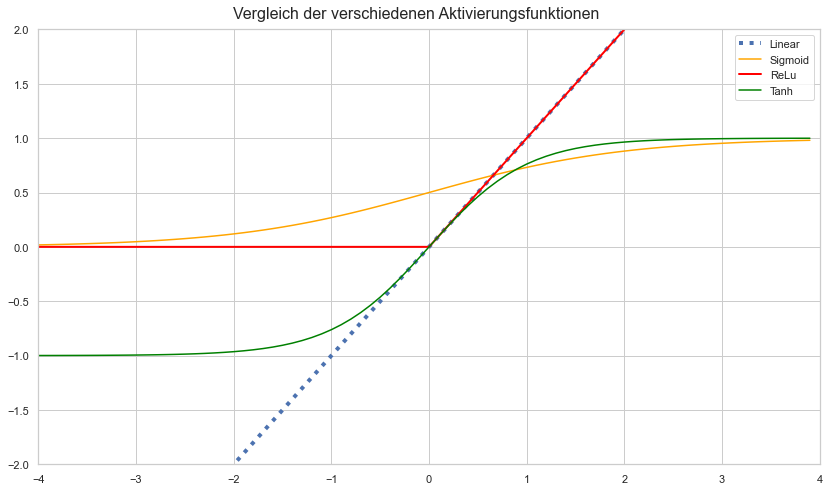

In [8]:
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize":(14,8)})
sns.set_style("whitegrid")
fig, ax = plt.subplots()
sns.lineplot(x=x,y=yl,linestyle="dotted",linewidth=4)
sns.lineplot(x=x,y=ys, color="orange")
sns.lineplot(x=x,y=yr,linewidth=2, color="red")
sns.lineplot(x=x,y=yt, color="green")
ax.set(ylim=(-2, 2))
ax.set(xlim=(-4, 4))
plt.legend(labels=["Linear","Sigmoid","ReLu","Tanh"])
fig.suptitle("Vergleich der verschiedenen Aktivierungsfunktionen", fontsize=16,y=0.92);

## Feed-Forward-Netz mit Backpropagation 

<img src="https://rocketloop.de/wp-content/uploads/2019/02/neural_networks_backpropagation.png" alt="KNN" width="800" height="600" > 

### Iris Dataset (Klassifikation von Schwertlilien)

In [9]:
from sklearn import datasets
import pandas as pd
#Laden des Datensatzes
iris_data = datasets.load_iris()
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df["target"] = iris_data.target
class_map = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}
df["target"] = df["target"].map(class_map)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


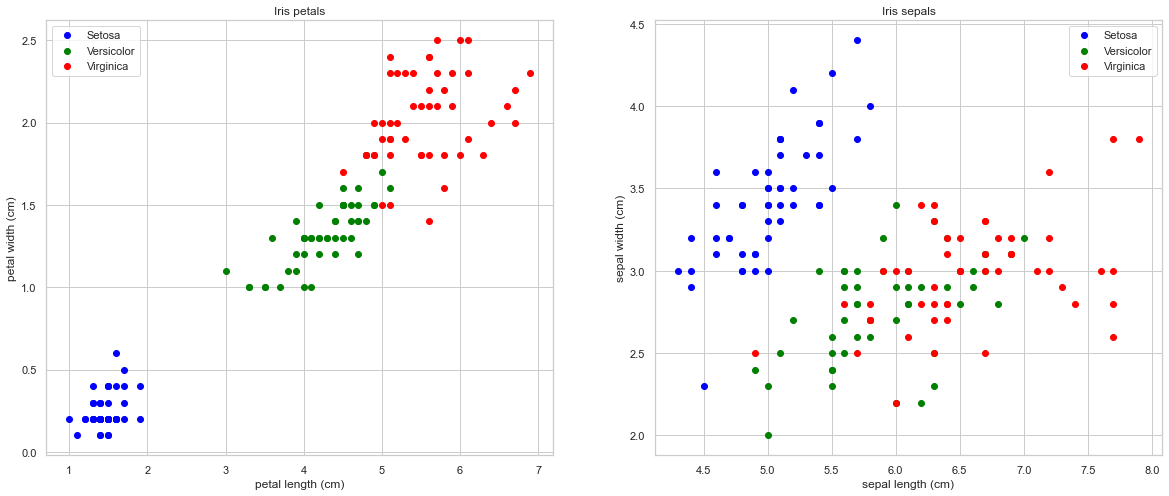

In [11]:
fig, axes = plt.subplots(1,2, figsize=(20,8))
setosa = df[df.target == "Setosa"]
versicolor = df[df.target=="Versicolor"]
virginica =df[df.target=="Virginica"]
axes[0].scatter(setosa["petal length (cm)"], setosa["petal width (cm)"], label="Setosa", facecolor="blue")
axes[0].scatter(versicolor["petal length (cm)"], versicolor["petal width (cm)"], label="Versicolor", facecolor="green")
axes[0].scatter(virginica["petal length (cm)"], virginica["petal width (cm)"], label="Virginica", facecolor="red")
axes[0].set_xlabel("petal length (cm)")
axes[0].set_ylabel("petal width (cm)")
axes[0].set_title("Iris petals")
axes[0].legend()
axes[1].scatter(setosa["sepal length (cm)"], setosa["sepal width (cm)"], label="Setosa", facecolor="blue")
axes[1].scatter(versicolor["sepal length (cm)"], versicolor["sepal width (cm)"], label="Versicolor", facecolor="green")
axes[1].scatter(virginica["sepal length (cm)"], virginica["sepal width (cm)"], label="Virginica", facecolor="red")
axes[1].set_xlabel("sepal length (cm)")
axes[1].set_ylabel("sepal width (cm)")
axes[1].set_title("Iris sepals")
axes[1].legend();

In [12]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
tf.random.set_seed(42)
import random
random.seed(42)
#Import des Iris Datensatzes und aufteilen in Traings- und Testdaten
x = iris_data.data
y = iris_data.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)
#Neuronales Nez mit zwei Schichten
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation="relu", input_shape=(4,)))
model.add(tf.keras.layers.Dense(units=3, activation="softmax"))
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=50)
#Berechnung der Genauigkeit des Modells
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

Epoch 1/50
4/4 [==============================] - 1s 5ms/step - loss: 1.5474 - accuracy: 0.0000e+00
Epoch 2/50
4/4 [==============================] - 0s 0s/step - loss: 1.4535 - accuracy: 0.0917
Epoch 3/50
4/4 [==============================] - 0s 0s/step - loss: 1.3839 - accuracy: 0.0833
Epoch 4/50
4/4 [==============================] - 0s 5ms/step - loss: 1.3256 - accuracy: 0.2083
Epoch 5/50
4/4 [==============================] - 0s 0s/step - loss: 1.2714 - accuracy: 0.3000
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 1.2182 - accuracy: 0.3000
Epoch 7/50
4/4 [==============================] - 0s 0s/step - loss: 1.1647 - accuracy: 0.3167
Epoch 8/50
4/4 [==============================] - 0s 0s/step - loss: 1.1168 - accuracy: 0.3000
Epoch 9/50
4/4 [==============================] - 0s 5ms/step - loss: 1.0733 - accuracy: 0.3250
Epoch 10/50
4/4 [==============================] - 0s 0s/step - loss: 1.0317 - accuracy: 0.3750
Epoch 11/50
4/4 [========================

In [13]:
#Neue Vorhersage
#sepal length (cm), sepal width (cm), petal length (cm), petal width (cm) 
new_prediction = np.array([[5.1, 3.4, 1.4, 0.2]])
class_map = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}
prediction = model.predict(new_prediction)
print(prediction)
print("Wahrscheinlichkeit Setosa",round(float(prediction[0][0]),4)*100,"%")
print("Wahrscheinlichkeit Versicolor",round(float(prediction[0][1]),4)*100,"%")
print("Wahrscheinlichkeit Virginica",round(float(prediction[0][2]),4)*100,"%")
predicted_class = np.argmax(prediction, axis=1)
predicted_class = class_map[predicted_class[0]]
print("")
print("Die Vorhersage lautet: "+predicted_class)

1/1 [==============================] - 0s 63ms/step
[[0.88526684 0.09001086 0.02472224]]
Wahrscheinlichkeit Setosa 88.53 %
Wahrscheinlichkeit Versicolor 9.0 %
Wahrscheinlichkeit Virginica 2.4699999999999998 %

Die Vorhersage lautet: Setosa


## Convolutional Neural Networks (CNN)

<img src="https://editor.analyticsvidhya.com/uploads/59954intro%20to%20CNN.JPG">

### MNIST Datensatz (handgeschriebene Ziffern)

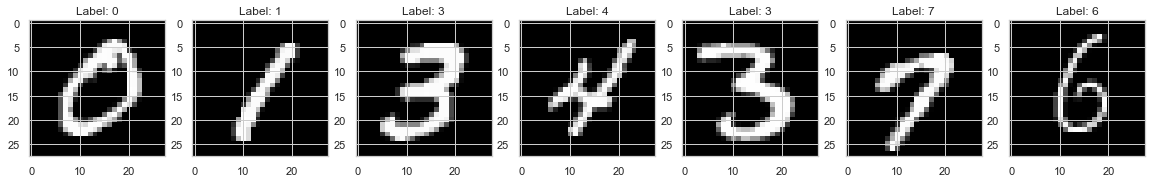

In [14]:
#Laden des Datensatzes
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
#Plotten von 7 Zahlen aus dem Datensatz
indices = [1,3,7,9,12,15,18,21]
images = x_train[indices]
labels = y_train[indices]
fig, axes = plt.subplots(1,7, figsize=(20,8))
for ax, img, label in zip(axes, images, labels):
    ax.imshow(img, cmap="gray")
    ax.set_title(f"Label: {label}")

In [15]:
#Normalisierung der Daten (Pixelwerte werden durch 255 geteilt, damit Daten zwischen 0 und 1)
x_train = x_train / 255.0
x_test = x_test / 255.0
#umwandeln mittels One-Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
#Neuronales Nez mit fünf Schichten
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=64, activation="relu"))
model.add(tf.keras.layers.Dense(units=10, activation="softmax"))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5)
#Berechnung der Genauigkeit des Modells
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1732 - accuracy: 0.9489
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0603 - accuracy: 0.9816
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0426 - accuracy: 0.9870
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0310 - accuracy: 0.9904
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0530 - accuracy: 0.9825
Test accuracy: 0.9825000166893005


## Rekurrentes neuronales Netz (RNN)

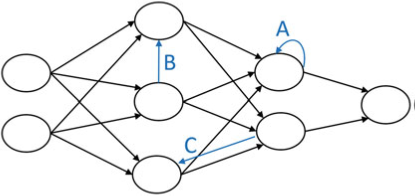

### Boston Housing Dataset

In [16]:
#Laden des Datensatzes
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()
df_train = pd.DataFrame(x_train, columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])
df_train["target"] = y_train
df_test = pd.DataFrame(x_test, columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])
df_test["target"] = y_test
df_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town.
- CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centres
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 Dollar
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: % lower status of the population
- target: Median value of owner-occupied homes in 1000 Dollars

In [17]:
# Normalisierung der Daten
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std
x_train = tf.expand_dims(x_train, axis=1)
x_test = tf.expand_dims(x_test, axis=1)
#Neuronales Nez mit zwei Schichten
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(units=64, input_shape=(None, x_train.shape[-1])))
model.add(tf.keras.layers.Dense(units=1))
model.compile(optimizer="adam", loss="mean_squared_error")
model = model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test))

Epoch 1/200
13/13 [==============================] - 2s 27ms/step - loss: 577.7275 - val_loss: 599.4466
Epoch 2/200
13/13 [==============================] - 0s 7ms/step - loss: 564.0116 - val_loss: 584.2266
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 550.9199 - val_loss: 570.3993
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 538.8774 - val_loss: 557.2104
Epoch 5/200
13/13 [==============================] - 0s 4ms/step - loss: 527.5439 - val_loss: 544.0290
Epoch 6/200
13/13 [==============================] - 0s 7ms/step - loss: 515.8957 - val_loss: 530.8708
Epoch 7/200
13/13 [==============================] - 0s 5ms/step - loss: 504.2621 - val_loss: 518.0796
Epoch 8/200
13/13 [==============================] - 0s 6ms/step - loss: 492.5800 - val_loss: 504.9208
Epoch 9/200
13/13 [==============================] - 0s 7ms/step - loss: 480.4579 - val_loss: 491.0484
Epoch 10/200
13/13 [==============================] - 0s 6ms/step - loss

Epoch 81/200
13/13 [==============================] - 0s 5ms/step - loss: 23.0536 - val_loss: 23.3359
Epoch 82/200
13/13 [==============================] - 0s 6ms/step - loss: 22.9263 - val_loss: 22.9131
Epoch 83/200
13/13 [==============================] - 0s 5ms/step - loss: 22.7770 - val_loss: 22.7588
Epoch 84/200
13/13 [==============================] - 0s 6ms/step - loss: 22.6851 - val_loss: 22.8485
Epoch 85/200
13/13 [==============================] - 0s 5ms/step - loss: 22.6437 - val_loss: 23.2823
Epoch 86/200
13/13 [==============================] - 0s 7ms/step - loss: 22.4132 - val_loss: 22.5648
Epoch 87/200
13/13 [==============================] - 0s 6ms/step - loss: 22.3803 - val_loss: 22.6126
Epoch 88/200
13/13 [==============================] - 0s 5ms/step - loss: 22.2764 - val_loss: 22.3706
Epoch 89/200
13/13 [==============================] - 0s 5ms/step - loss: 22.0966 - val_loss: 22.4015
Epoch 90/200
13/13 [==============================] - 0s 7ms/step - loss: 22.0086 

13/13 [==============================] - 0s 5ms/step - loss: 16.1008 - val_loss: 18.5505
Epoch 161/200
13/13 [==============================] - 0s 4ms/step - loss: 16.0657 - val_loss: 18.9274
Epoch 162/200
13/13 [==============================] - 0s 5ms/step - loss: 15.9957 - val_loss: 18.7374
Epoch 163/200
13/13 [==============================] - 0s 3ms/step - loss: 15.9600 - val_loss: 19.1744
Epoch 164/200
13/13 [==============================] - 0s 4ms/step - loss: 15.9394 - val_loss: 18.5474
Epoch 165/200
13/13 [==============================] - 0s 4ms/step - loss: 15.8258 - val_loss: 18.8211
Epoch 166/200
13/13 [==============================] - 0s 4ms/step - loss: 15.7767 - val_loss: 18.8443
Epoch 167/200
13/13 [==============================] - 0s 4ms/step - loss: 15.6943 - val_loss: 18.4030
Epoch 168/200
13/13 [==============================] - 0s 5ms/step - loss: 15.7694 - val_loss: 19.1155
Epoch 169/200
13/13 [==============================] - 0s 5ms/step - loss: 15.6024 - va

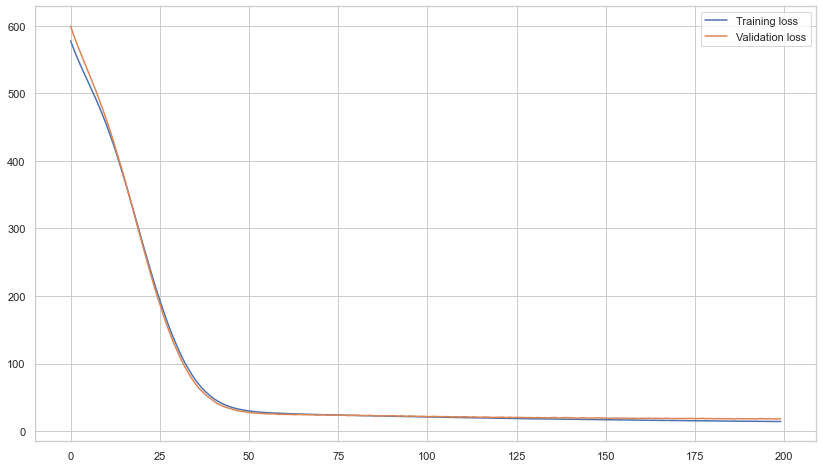

In [18]:
plt.plot(model.history ["loss"], label="Training loss")
plt.plot(model.history["val_loss"], label="Validation loss")
plt.legend();

## Long short-term memory (LSTM)

<img src="https://blog.floydhub.com/content/images/2019/06/Slide19.JPG" img>

### Airline Passenger

In [19]:
df=pd.read_csv(r"C:\Users\Besitzer\Dropbox\Aalen DS\Term 6\Business Intelligence\AirPassengers.csv")
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


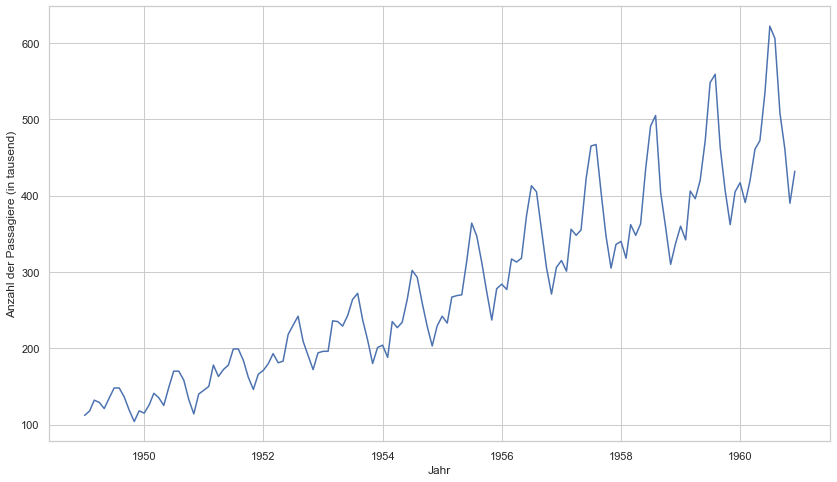

In [21]:
df["Month"] = pd.to_datetime(df["Month"])
plt.plot(df["Month"], df["Passengers"])
plt.xlabel("Jahr")
plt.ylabel("Anzahl der Passagiere (in tausend)");

Nachfolgender Code ist zum Großteil von: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/ entnommen

In [22]:
from sklearn.preprocessing import MinMaxScaler
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error
# Funktion zum konverteiren eines Arrays in eine Matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
# Datensatz laden und in Numpy array umwandeln
dataframe = pd.read_csv(r"C:\Users\Besitzer\Dropbox\Aalen DS\Term 6\Business Intelligence\AirPassengers.csv", usecols=[1])
dataset = dataframe.values
dataset = dataset.astype("float32")
# Normalisieren der Daten
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# Aufteilen Trainings- und Testdaten
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# aufrufen der create_dataset Funktion und reshape der Daten
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# Neuronales Nez mit zwei Schichten
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(trainX, trainY, epochs=40, batch_size=1)

Epoch 1/40
98/98 [==============================] - 3s 3ms/step - loss: 0.0483
Epoch 2/40
98/98 [==============================] - 0s 2ms/step - loss: 0.0237
Epoch 3/40
98/98 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 4/40
98/98 [==============================] - 0s 3ms/step - loss: 0.0152
Epoch 5/40
98/98 [==============================] - 0s 3ms/step - loss: 0.0141
Epoch 6/40
98/98 [==============================] - 0s 3ms/step - loss: 0.0130
Epoch 7/40
98/98 [==============================] - 0s 3ms/step - loss: 0.0120
Epoch 8/40
98/98 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 9/40
98/98 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 10/40
98/98 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 11/40
98/98 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 12/40
98/98 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 13/40
98/98 [==============================

2/2 [==============================] - 0s 0s/step


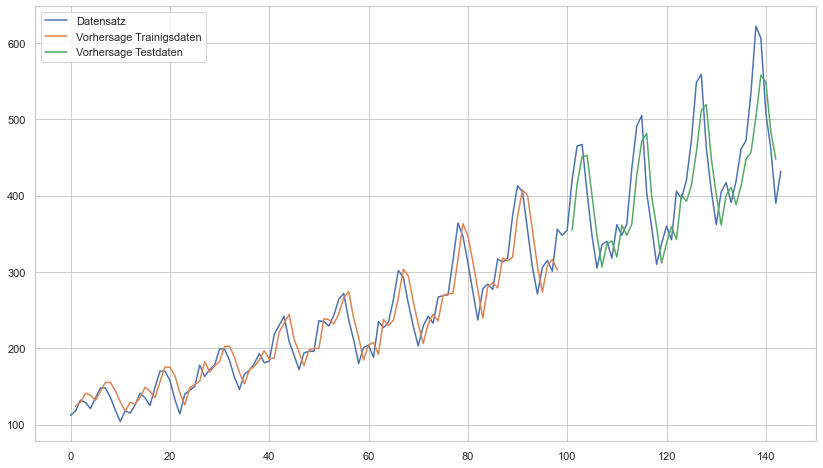

In [23]:
# Vorhersagen machen
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# aufheben der Skalierung
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# Plot erzeugen
plt.plot(scaler.inverse_transform(dataset),label="Datensatz")
plt.plot(trainPredictPlot,label="Vorhersage Trainigsdaten")
plt.plot(testPredictPlot,label="Vorhersage Testdaten")
plt.legend();

## Webapp Implementierung eines neuronalen Netzes:
https://tobiarnold-neuralnetwork-main-fio4nq.streamlit.app/